# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below.

import numpy as np

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept:  6.33
R-Squared:  0.97
----------------------------
Model: Y = 0.56 * X + 6.33


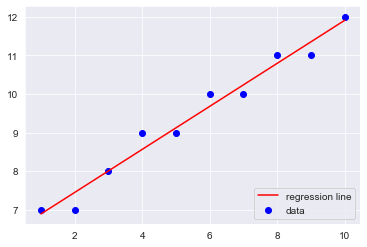

In [2]:
def slope(X, Y):
    return ((X.mean() * Y.mean()) - ((X * Y).sum() / len(X))) / ((X.mean()**2) - ((X * X).mean()))

def y_intercept(X, Y):
    return Y.mean() - (slope(X, Y) * X.mean())

def y_pred(m, X, b):   
    return m*X + b

def r_squared(Y, Y_pred):
    return 1 - (((Y - Y_pred)**2).sum() / ((Y - Y.mean())**2).sum())

print("Basic Regression Diagnostics")
print("----------------------------")
m = slope(X, Y)
print("Slope: {}".format(round(m, 2)))
b = y_intercept(X, Y)
print("Y-Intercept:  {}".format(round(b, 2)))
reg_line = y_pred(m, X, b)
#print("Y-pred:  {}".format(Y_pred))
r_sq = r_squared(Y, reg_line)
print("R-Squared:  {}".format(round(r_sq, 2)))
print("----------------------------")
print("Model: Y = {} * X + {}".format(round(m, 2), round(b, 2)))

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

plt.scatter(X, Y, color='blue')
plt.plot(X, reg_line, color='red')

plt.legend(['regression line', 'data'], loc='lower right')
plt.show();

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

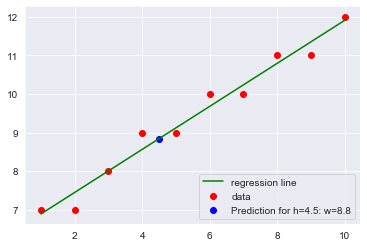

In [3]:
# Make prediction for x = 4.5 and visualize on the scatter plot
plt.scatter(X, Y, color='red')
plt.plot(X, reg_line, color='green')

X_pred = np.array([4.5])
Y_pred = y_pred(m, X_pred, b)
plt.scatter(X_pred, Y_pred, color='blue')

plt.legend(['regression line', 'data', 'Prediction for h={}: w={}'.format(round(X_pred[0], 1), round(Y_pred[0], 1))], loc='lower right')
plt.show();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

In [4]:
import pandas as pd

df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


----------------------------
Slope: 5.54
Y-Intercept:  -204.48
R-Squared:  0.96
----------------------------
Model: Y = 5.54 * X + -204.48


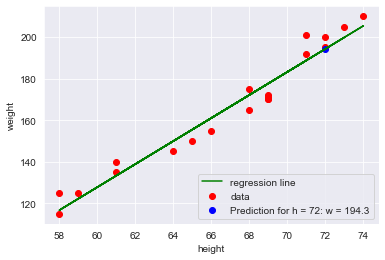

In [5]:
print("----------------------------")
X = df['height']
Y = df['weight']
m = slope(X, Y)
print("Slope: {}".format(round(m, 2)))
b = y_intercept(X, Y)
print("Y-Intercept:  {}".format(round(b, 2)))
reg_line = y_pred(m, X, b)
r_sq = r_squared(Y, reg_line)
print("R-Squared:  {}".format(round(r_sq, 2)))
print("----------------------------")
print("Model: Y = {} * X + {}".format(round(m, 2), round(b, 2)))

plt.scatter(X, Y, color='red')
plt.plot(X, reg_line, color='green')

X_pred = np.array([72])
Y_pred = y_pred(m, X_pred, b)
plt.scatter(X_pred, Y_pred, color='blue')

plt.legend(['regression line', 'data', 'Prediction for h = {}: w = {}'.format(round(X_pred[0], 1), round(Y_pred[0], 1))], loc='lower right')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show();

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 